In [1]:
#Import Library
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
#load dataset after preprocessing
dsa = pd.read_csv('data_ap_s_a_f.csv')

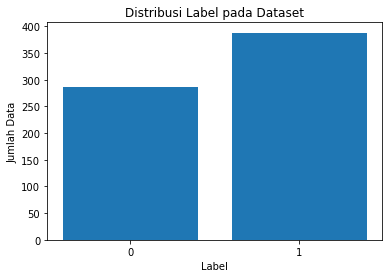

In [3]:
count_label = dsa['Fasilitas'].value_counts()

# Membuat diagram batang
plt.bar(count_label.index, count_label.values)
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Label pada Dataset')
plt.show()

Epoch 1/100
7/7 [==============================] - 10s 285ms/step - loss: 0.6913 - accuracy: 0.5615 - val_loss: 0.6873 - val_accuracy: 0.5741
Epoch 2/100
7/7 [==============================] - 0s 38ms/step - loss: 0.6836 - accuracy: 0.5754 - val_loss: 0.6807 - val_accuracy: 0.5741
Epoch 3/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6754 - accuracy: 0.5754 - val_loss: 0.6651 - val_accuracy: 0.5741
Epoch 4/100
7/7 [==============================] - 0s 34ms/step - loss: 0.6471 - accuracy: 0.6032 - val_loss: 0.6157 - val_accuracy: 0.6204
Epoch 5/100
7/7 [==============================] - 0s 34ms/step - loss: 0.5819 - accuracy: 0.7123 - val_loss: 0.5778 - val_accuracy: 0.6667
Epoch 6/100
7/7 [==============================] - 0s 37ms/step - loss: 0.5441 - accuracy: 0.7355 - val_loss: 0.5759 - val_accuracy: 0.6759
Epoch 7/100
7/7 [==============================] - 0s 48ms/step - loss: 0.4971 - accuracy: 0.7587 - val_loss: 0.5514 - val_accuracy: 0.7037
Epoch 8/100
7/7 [=

7/7 [==============================] - 0s 35ms/step - loss: 0.0268 - accuracy: 0.9930 - val_loss: 1.1127 - val_accuracy: 0.7593
Epoch 60/100
7/7 [==============================] - 0s 37ms/step - loss: 0.0166 - accuracy: 0.9954 - val_loss: 1.1710 - val_accuracy: 0.7500
Epoch 61/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0160 - accuracy: 0.9977 - val_loss: 1.1761 - val_accuracy: 0.7500
Epoch 62/100
7/7 [==============================] - 0s 49ms/step - loss: 0.0262 - accuracy: 0.9930 - val_loss: 1.1881 - val_accuracy: 0.7593
Epoch 63/100
7/7 [==============================] - 0s 41ms/step - loss: 0.2663 - accuracy: 0.9002 - val_loss: 1.0853 - val_accuracy: 0.6574
Epoch 64/100
7/7 [==============================] - 0s 38ms/step - loss: 0.2321 - accuracy: 0.8794 - val_loss: 0.7710 - val_accuracy: 0.7130
Epoch 65/100
7/7 [==============================] - 0s 50ms/step - loss: 0.1296 - accuracy: 0.9606 - val_loss: 0.6418 - val_accuracy: 0.7315
Epoch 66/100
7/7 [========

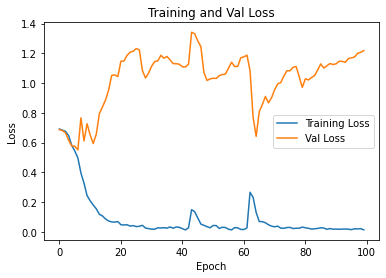

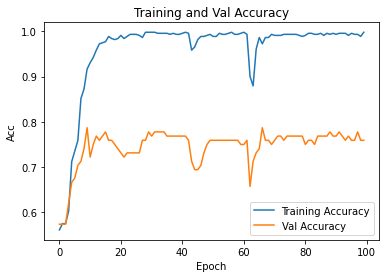

In [16]:
#Model Sentiment with Sastrawi stopword and Nazief Adriani Stemmer
texts = dsa['Ulasan']
labels = dsa['Fasilitas']

#Tokenizer and Pad Sequence
dsa_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dsa_token.fit_on_texts(texts)
X = dsa_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dsa_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model2 = Sequential()
model2.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model2.add(Bidirectional(LSTM(units = 64, dropout = 0.2, return_sequences = True)))
model2.add(Dropout(0.6))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Bidirectional(LSTM(units = 32)))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [38]:
# NA
# Preprocess data
data = ["tiket murah main banyak asyik jalan keluarga", "murah air bersih parkir luas mandang indah pujasera lengkap overall bagus"]
label = [1,1]
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(dsa['Ulasan'].astype(str))
X = tokenizer.texts_to_sequences(data)
X = pad_sequences(X, maxlen=50, padding='post')

# Make predictions
predictions = model2.predict(X)
rounded_predictions = np.round(predictions).astype(int)

accuracy = accuracy_score(label, rounded_predictions)
report = classification_report(label, rounded_predictions)
cm = confusion_matrix(label, rounded_predictions)

print('Accuracy:', accuracy)
print(cm)
print(report)


Accuracy: 1.0
[[2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [37]:
model2.save('s_a_fn.h5')